In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data_path = "curve_fitting_data/"
plt.rcParams['font.size'] = 20 
figsize = (12, 9)

## mean and standard deviation

In [3]:
mean = 0
stan_dev = 5 # standard deviation

# objective function

In [4]:
function = lambda x: 0.2*(x+1)*(x-2)*x

## some variables

In [5]:
x = np.arange(-5, 5, 0.2)
x

array([-5.0000000e+00, -4.8000000e+00, -4.6000000e+00, -4.4000000e+00,
       -4.2000000e+00, -4.0000000e+00, -3.8000000e+00, -3.6000000e+00,
       -3.4000000e+00, -3.2000000e+00, -3.0000000e+00, -2.8000000e+00,
       -2.6000000e+00, -2.4000000e+00, -2.2000000e+00, -2.0000000e+00,
       -1.8000000e+00, -1.6000000e+00, -1.4000000e+00, -1.2000000e+00,
       -1.0000000e+00, -8.0000000e-01, -6.0000000e-01, -4.0000000e-01,
       -2.0000000e-01,  4.4408921e-15,  2.0000000e-01,  4.0000000e-01,
        6.0000000e-01,  8.0000000e-01,  1.0000000e+00,  1.2000000e+00,
        1.4000000e+00,  1.6000000e+00,  1.8000000e+00,  2.0000000e+00,
        2.2000000e+00,  2.4000000e+00,  2.6000000e+00,  2.8000000e+00,
        3.0000000e+00,  3.2000000e+00,  3.4000000e+00,  3.6000000e+00,
        3.8000000e+00,  4.0000000e+00,  4.2000000e+00,  4.4000000e+00,
        4.6000000e+00,  4.8000000e+00])

In [6]:
y = function(x)
y

array([-2.80000000e+01, -2.48064000e+01, -2.18592000e+01, -1.91488000e+01,
       -1.66656000e+01, -1.44000000e+01, -1.23424000e+01, -1.04832000e+01,
       -8.81280000e+00, -7.32160000e+00, -6.00000000e+00, -4.83840000e+00,
       -3.82720000e+00, -2.95680000e+00, -2.21760000e+00, -1.60000000e+00,
       -1.09440000e+00, -6.91200000e-01, -3.80800000e-01, -1.53600000e-01,
        2.13162821e-15,  8.96000000e-02,  1.24800000e-01,  1.15200000e-01,
        7.04000000e-02, -1.77635684e-15, -8.64000000e-02, -1.79200000e-01,
       -2.68800000e-01, -3.45600000e-01, -4.00000000e-01, -4.22400000e-01,
       -4.03200000e-01, -3.32800000e-01, -2.01600000e-01,  7.46069873e-15,
        2.81600000e-01,  6.52800000e-01,  1.12320000e+00,  1.70240000e+00,
        2.40000000e+00,  3.22560000e+00,  4.18880000e+00,  5.29920000e+00,
        6.56640000e+00,  8.00000000e+00,  9.60960000e+00,  1.14048000e+01,
        1.33952000e+01,  1.55904000e+01])

In [7]:
t = function(x) + np.random.normal(mean, stan_dev, x.shape)
t

array([-28.49206227, -27.19545555, -24.06916402, -20.94756076,
       -26.98149817, -18.88963325,  -8.7898055 , -16.87692826,
       -11.07916678,  -6.58108111,  -6.6499204 ,  -4.89914072,
        -2.20827317,  -4.72915985,  -1.0829073 ,  -0.04244581,
        -0.33535579,  -9.13694586,   4.26875145,   3.36889651,
         4.10356742,  -6.14605981,   1.24608786, -11.0875313 ,
        -2.09082391,   3.97267562,  -1.33419432,  -8.31893094,
         3.8892963 ,  -7.08034919,  -1.04103362,   3.20602961,
         4.38128416,  -1.07215232,   3.49745466,   2.75370039,
        -5.24645838,   2.45901141,   5.20916115,  -7.94688295,
         9.87485758,   6.73139574,   5.57766382,   5.41855752,
         8.07822493,  10.84649199,  13.86951234,   9.44109987,
        22.67021457,  19.90114251])

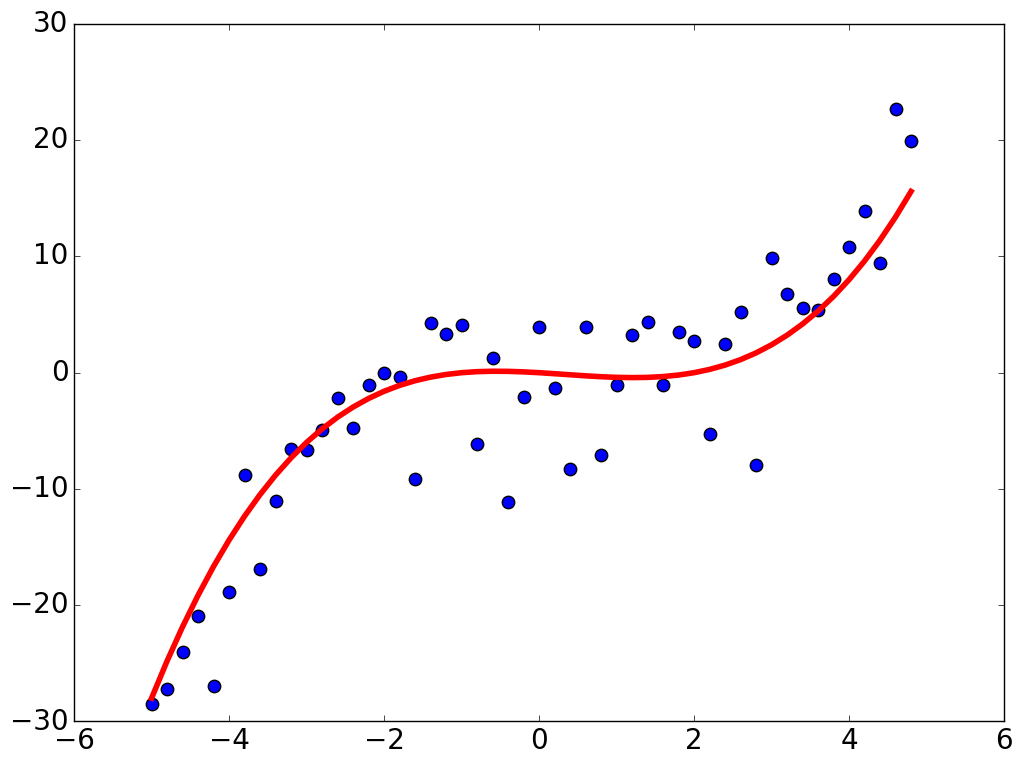

In [8]:
plt.figure(figsize=figsize)
plt.scatter(x, t, c="b", label="t", s=80)
plt.plot(x, y, c="r", label="y",linewidth=4)
plt.ylim(-30, 30)
#plt.legend()
plt.savefig(data_path+"simple_plot.png")

## gaussian distribution

In [9]:
def distribution(x, mean, stan_dev):
    acc = 1 / (stan_dev**2)
    normalize = 1 / np.sqrt(2 * np.pi / acc)
    return normalize * np.exp(- 0.5 * acc * (x-mean)**2)

In [10]:
size = 10000

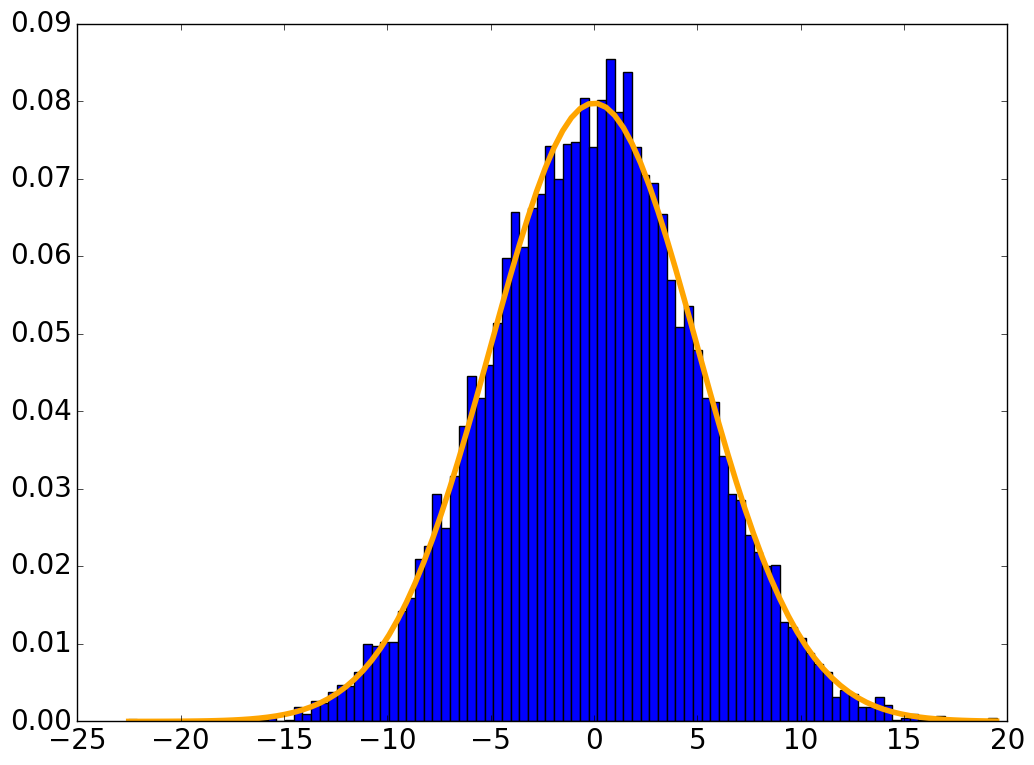

In [11]:
plt.figure(figsize=figsize)
#histgram = plt.hist(np.random.normal(mean, stan_dev, size), bins=np.int(np.sqrt(size)), density=True)
histgram = plt.hist(np.random.normal(mean, stan_dev, size), bins=np.int(np.sqrt(size)), color="b", normed=True)
plt.plot(histgram[1], distribution(histgram[1], mean, stan_dev), color="orange" ,linewidth=4)

## value and distribution

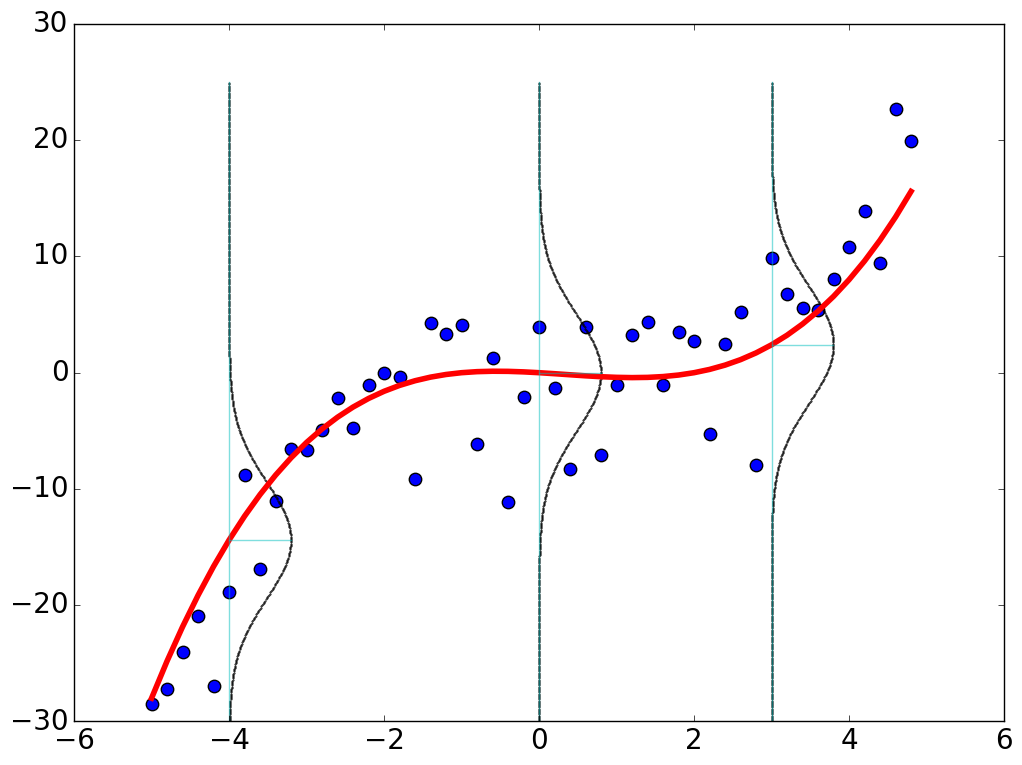

In [12]:
scale = 10
vertical = np.arange(-30, 25, 0.1)
plt.figure(figsize=figsize)
plt.scatter(x, t, c="b", label="t", s=80)
plt.plot(x, y, c="r", label="y",linewidth=4)
plt.plot([-4, -4], [-30, 25], c="c", alpha=0.5)
plt.plot([-4, scale*np.max(distribution(vertical, function(-4), stan_dev))-4], [function(-4), function(-4)], c="c", alpha=0.5)
plt.scatter(scale*distribution(vertical, function(-4), stan_dev)-4, vertical, c="black", s=0.2)
plt.plot([0, 0], [-30, 25], c="c", alpha=0.5)
plt.plot([0, scale*np.max(distribution(vertical, function(0), stan_dev))], [function(0), function(0)], c="c", alpha=0.5)
plt.scatter(scale*distribution(vertical, function(0), stan_dev), vertical, c="black", s=0.2)
plt.plot([3, 3], [-30, 25], c="c", alpha=0.5)
plt.plot([3, scale*np.max(distribution(vertical, function(3), stan_dev))+3], [function(3), function(3)], c="c", alpha=0.5)
plt.scatter(scale*distribution(vertical, function(3), stan_dev)+3, vertical, c="black", s=0.2)
plt.ylim(-30, 30)
#plt.legend()
plt.savefig(data_path+"noise_plot.png")

## estimate from t

In [13]:
#get t-value around the point that x = 0
median = int(x.shape[0] / 2)
around_zero_t = t[median-5:median+5]
around_zero_t

array([  4.10356742,  -6.14605981,   1.24608786, -11.0875313 ,
        -2.09082391,   3.97267562,  -1.33419432,  -8.31893094,
         3.8892963 ,  -7.08034919])

In [14]:
#mean
np.mean(around_zero_t)

-2.2846262272965547

In [15]:
#standard deviation
np.std(around_zero_t)

5.322598849976864

## add curve fitting

In [16]:
from scipy.optimize import curve_fit
def linear(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [17]:
param, _  = curve_fit(linear, x, t)

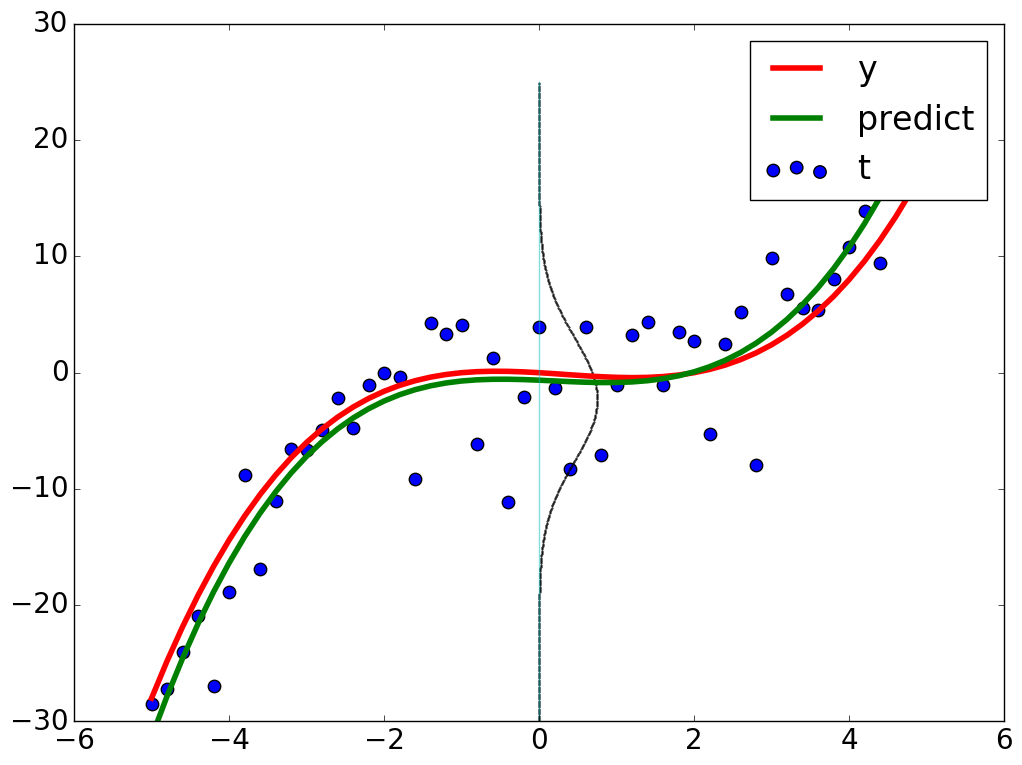

In [18]:
scale = 10
vertical = np.arange(-30, 25, 0.1)
plt.figure(figsize=figsize)
plt.scatter(x, t, c="b", label="t", s=80,)
plt.plot(x, y, c="r", label="y",linewidth=4)
plt.plot(x, linear(x, param[0], param[1], param[2], param[3]), c="g", label="predict",linewidth=4)
plt.plot([0, 0], [-30, 25], c="c", alpha=0.5)
plt.scatter(scale*distribution(vertical, np.mean(around_zero_t), np.std(around_zero_t)), vertical, c="black", s=0.2)
plt.ylim(-30, 30)
plt.legend()

# maximum likelihood

In [19]:
x = np.arange(-5, 5, 0.01)

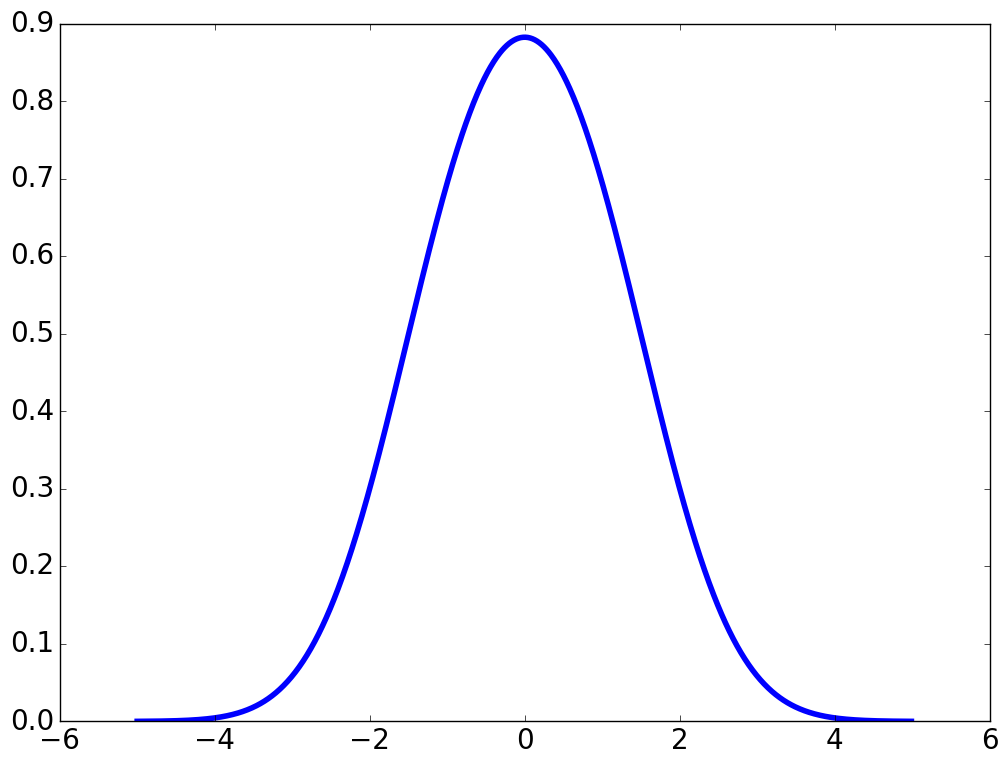

In [20]:
plt.figure(figsize=figsize)
three_dist = distribution(x, -1, 1) + distribution(x, 0, 1) + distribution(x, 1, 1)
plt.plot(x, three_dist, linewidth=4)
plt.savefig(data_path+"sum_of_3dist.png")

## 3 distribution is similar to this

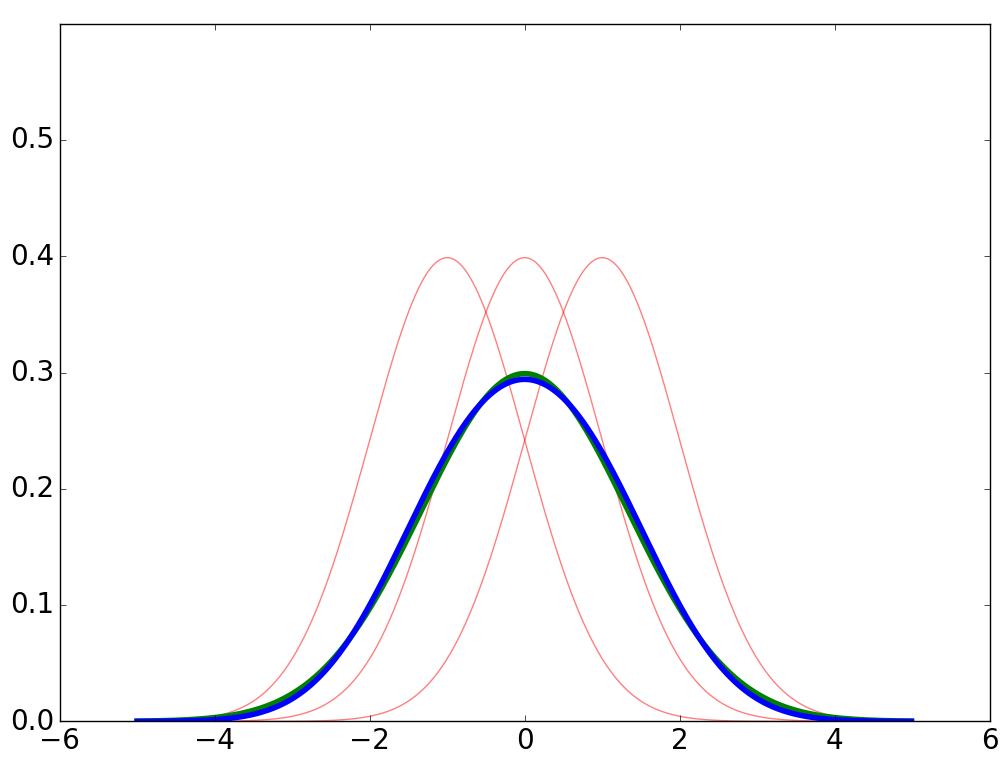

In [21]:
plt.figure(figsize=figsize)
plt.plot(x, distribution(x, -1, 1), c="r", alpha=0.5)
plt.plot(x, distribution(x, 0, 1), c="r", alpha=0.5)
plt.plot(x, distribution(x, 1, 1), c="r", alpha=0.5)
plt.plot(x, distribution(x, 0, 1+1/3), c="g", linewidth=4)
plt.plot(x, three_dist/3, c="b", linewidth=4)
plt.ylim(0, 0.6)
plt.savefig(data_path+"same_as_1dist.png")

In [22]:
sample = 33
dist1 = np.random.normal(-1, 1, int(sample/3))
dist2 = np.random.normal(0, 1, int(sample/3))
dist3 = np.random.normal(1, 1, int(sample/3))

mean -0.8651515889371582
std(ML) 1.5913736142374553


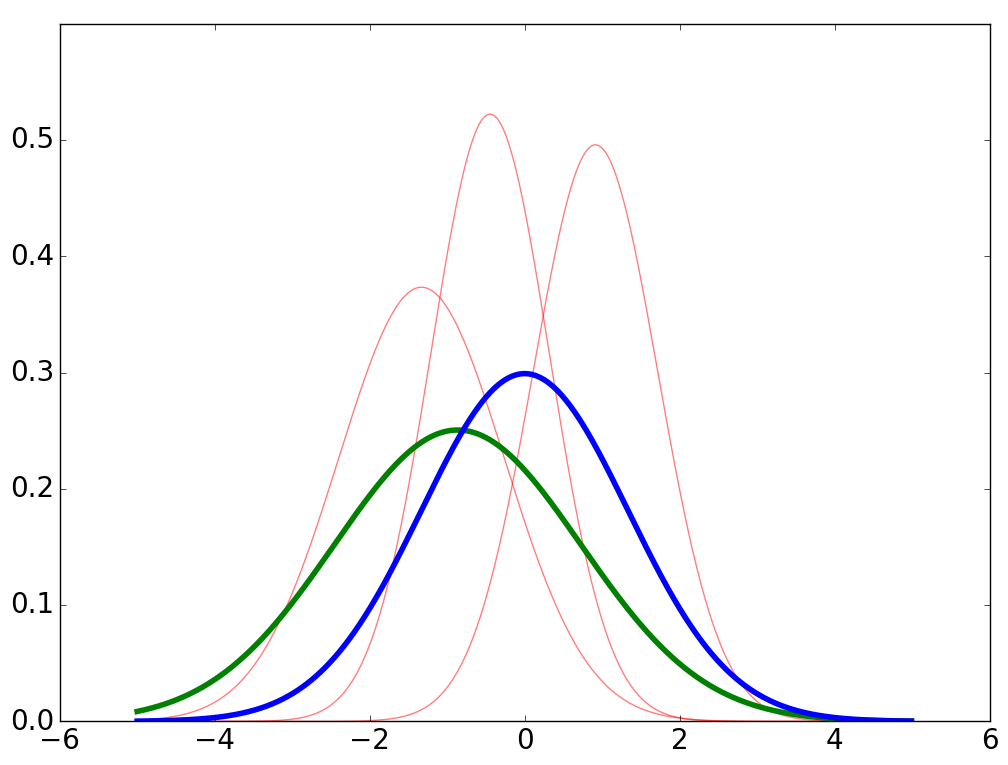

In [23]:
plt.figure(figsize=figsize)
plt.plot(x, distribution(x, np.mean(dist1), np.std(dist1)), c="r", alpha=0.5)
plt.plot(x, distribution(x, np.mean(dist2), np.std(dist2)), c="r", alpha=0.5)
plt.plot(x, distribution(x, np.mean(dist3), np.std(dist3)), c="r", alpha=0.5)
print("mean", np.mean(dist1+dist2+dist3))
print("std(ML)", np.std(dist1+dist2+dist3, ddof=1))
plt.plot(x, distribution(x, np.mean(dist1+dist2+dist3), np.std(dist1+dist2+dist3, ddof=1)), c="g", linewidth=4)
plt.plot(x, distribution(x, 0, 1+1/3), c="b", linewidth=4)
plt.ylim(0, 0.6)
plt.savefig(data_path+"sample_"+str(sample)+"_ML.png")

mean -0.10534867940764808
std(ML) 1.7150153961536476


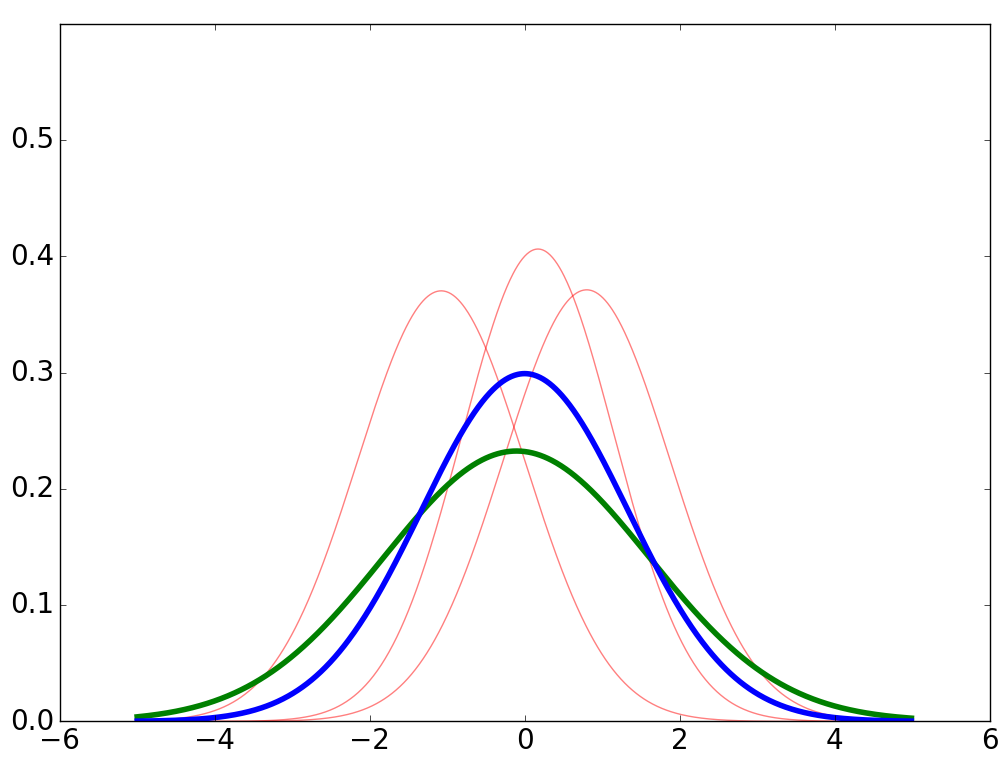

In [24]:
sample = 333
plt.figure(figsize=figsize)
dist1 = np.random.normal(-1, 1, int(sample/3))
dist2 = np.random.normal(0, 1, int(sample/3))
dist3 = np.random.normal(1, 1, int(sample/3))
plt.plot(x, distribution(x, np.mean(dist1), np.std(dist1)), c="r", alpha=0.5)
plt.plot(x, distribution(x, np.mean(dist2), np.std(dist2)), c="r", alpha=0.5)
plt.plot(x, distribution(x, np.mean(dist3), np.std(dist3)), c="r", alpha=0.5)
print("mean", np.mean(dist1+dist2+dist3))
print("std(ML)", np.std(dist1+dist2+dist3, ddof=1))
plt.plot(x, distribution(x, np.mean(dist1+dist2+dist3), np.std(dist1+dist2+dist3, ddof=1)), c="g", linewidth=4)
plt.plot(x, distribution(x, 0, 1+1/3), c="b", linewidth=4)
plt.ylim(0, 0.6)
plt.savefig(data_path+"sample_"+str(sample)+"_ML.png")

mean -0.025853469022706202
std(unbiased) 1.3119938318084852


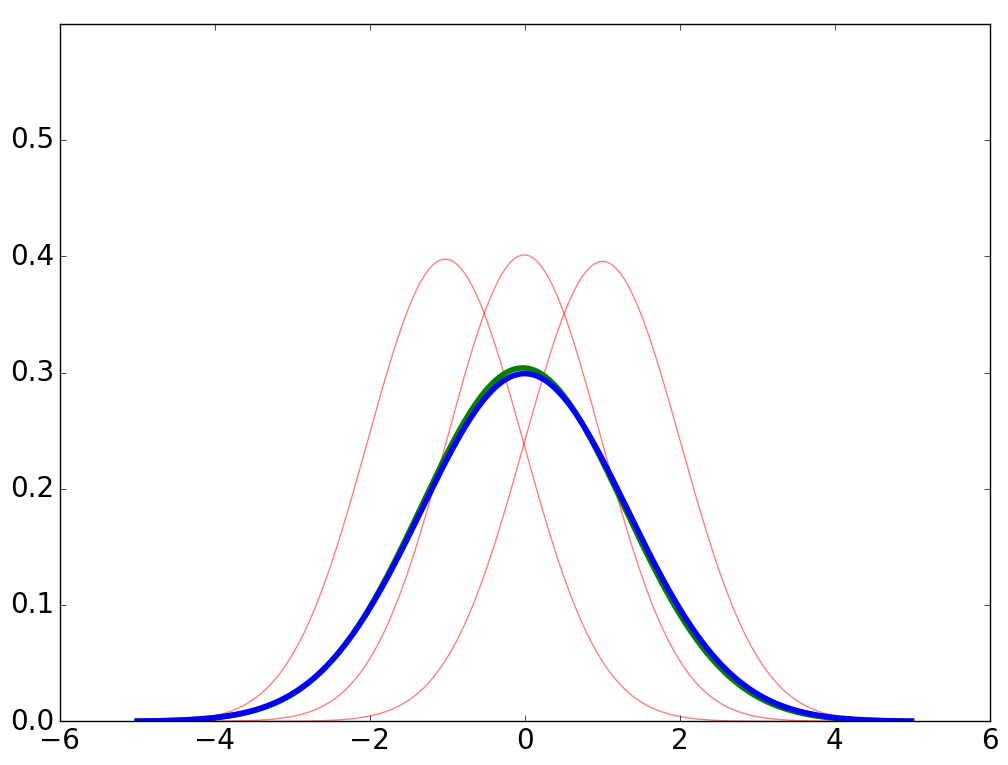

In [25]:
sample = 33333
plt.figure(figsize=figsize)
dist1 = np.random.normal(-1, 1, int(sample/3))
dist2 = np.random.normal(0, 1, int(sample/3))
dist3 = np.random.normal(1, 1, int(sample/3))
plt.plot(x, distribution(x, np.mean(dist1), np.std(dist1)), c="r", alpha=0.5)
plt.plot(x, distribution(x, np.mean(dist2), np.std(dist2)), c="r", alpha=0.5)
plt.plot(x, distribution(x, np.mean(dist3), np.std(dist3)), c="r", alpha=0.5)
print("mean", np.mean(dist1+dist2+dist3))
print("std(unbiased)", np.sqrt(np.std(dist1+dist2+dist3, ddof=1)))
plt.plot(x, distribution(x, np.mean(dist1+dist2+dist3), np.sqrt(np.std(dist1+dist2+dist3, ddof=1))), c="g", linewidth=4)
plt.plot(x, distribution(x, 0, 1+1/3), c="b", linewidth=4)
plt.ylim(0, 0.6)
plt.savefig(data_path+"sample_"+str(sample)+"_ML.png")

# bayesian curve fitting

こちらの url を参考に実装することができます。http://aidiary.hatenablog.com/entry/20100404/1270359720

curve fitting で使用した scipy には含まれてないよと stack overflow に書いてあったけども、こういったライブラリには細かい所に手が届かないのはありがちなことなので調べてないです。

ただし，sklearn には，linear_model の中に, Ridge 回帰に加えて, Bayesian Ridge 回帰があるので，多分いけます。使ったことはないです。https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

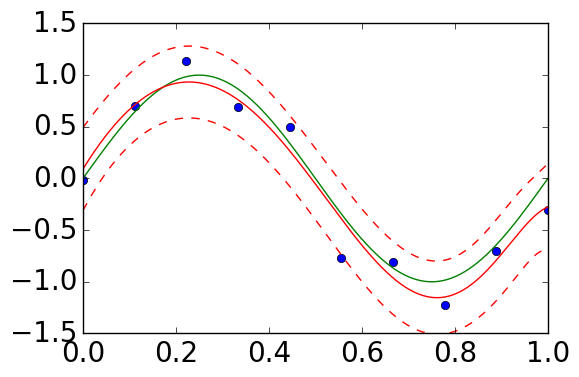

In [31]:
M = 9
ALPHA = 0.005
BETA = 11.1

# M次多項式近似
def y(x, wlist):
    ret = wlist[0]
    for i in range(1, M+1):
        ret += wlist[i] * (x ** i)
    return ret

def phi(x):
    data = []
    for i in range(0, M+1):
        data.append(x**i)
    ret = np.matrix(data).reshape((M+1, 1))  # 縦ベクトルで返す
    return ret

# 式1.70
def mean(x, xlist, tlist, S):
    sums = np.zeros((M+1, 1))
    for n in range(len(xlist)):
        sums += phi(xlist[n]) * tlist[n]
    ret = BETA * phi(x).transpose() * S * sums
    return ret

# 式1.71
def variance(x, xlist, S):
    ret = 1.0 / BETA + phi(x).transpose() * S * phi(x)
    return ret

# 訓練データ
# sin(2*pi*x)の関数値にガウス分布に従う小さなランダムノイズを加える
xlist = np.linspace(0, 1, 10)
tlist = np.sin(2*np.pi*xlist) + np.random.normal(0, 0.2, xlist.size)

# ベイズ曲線フィッティングを用いて予測分布を求める
# 行列Sを計算
sums = np.zeros((M+1, M+1))
for n in range(len(xlist)):
    sums += phi(xlist[n]) * phi(xlist[n]).transpose()
I = np.matrix(np.identity(M+1))
S_inv = ALPHA * I + BETA * sums
S = S_inv.getI()

# 連続関数のプロット用X値
xs = np.linspace(0, 1, 500)
ideal = np.sin(2*np.pi*xs)         # 理想曲線
means = []
uppers = []
lowers = []
for x in xs:
    m = mean(x, xlist, tlist, S)[0,0]       # 予測分布の平均
    s = np.sqrt(variance(x, xlist, S)[0,0]) # 予測分布の標準偏差
    u = m + s                               # 平均 + 標準偏差
    l = m - s                               # 平均 - 標準偏差
    means.append(m)
    uppers.append(u)
    lowers.append(l)

plt.plot(xlist, tlist, 'bo')  # 訓練データ
plt.plot(xs, ideal, 'g-')     # 理想曲線
plt.plot(xs, means, 'r-')     # 予測モデルの平均
plt.plot(xs, uppers, 'r--')   # +sigma
plt.plot(xs, lowers, 'r--')   # -sigma
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.show()